In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random
import utils

In [3]:
#Квадратичный подход
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = price_per_room * num_rooms + base_price
    base_price = base_price + learning_rate * (price - predicted_price)
    price_per_room = price_per_room + learning_rate * num_rooms *(price - predicted_price)
    return base_price, price_per_room


In [26]:
#Абсолютный подход
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = price_per_room * num_rooms + base_price
    if price > predicted_price:
        price_per_room += learning_rate * num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate * num_rooms
        base_price -= learning_rate
    return base_price, price_per_room

In [16]:
#Линейная регрессия
def linear_regression(features, labels, learning_rate = 0.01, epochs = 1000):
    price_per_room = random.randint(10, 30)
    base_price = random.randint(5, 10)
    errors = []
    for epoch in range(epochs):
        predictions = features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        price = labels[i]
        base_price, price_per_room = square_trick(base_price, price_per_room, num_rooms, price, learning_rate = learning_rate)
        
    return base_price, price_per_room, errors
        

In [15]:
#квадратный корень из средней квадратической ошибки
def rmse(labels, predictions):
    n = len(labels)
    diff = np.subtract(labels, predictions)
    return np.sqrt(1.0 / n * (np.dot(diff, diff)))

[1 2 3 5 6 7] 
 [155 197 244 356 407 448] 



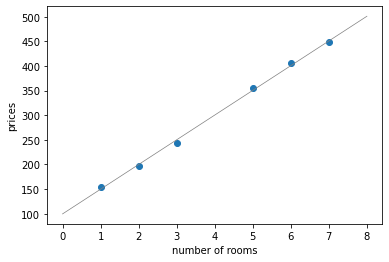

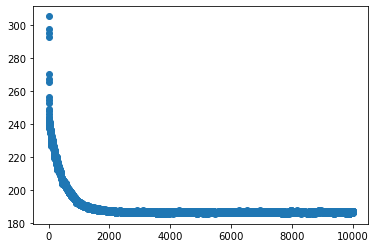

In [23]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])
print(features, '\n' , labels, '\n')

utils.plot_points(features, labels)

base_price, price_per_room, errors = linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

utils.draw_line(price_per_room, base_price)

plt.show()
plt.scatter(range(len(errors)), errors)
plt.show()